In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # pip install statsmodels

# Task 1 - Exploratory Data Analysis
## Task 1.1 White noise series
A time series is white noise if the variables are independent and identically distributed
(iid) with a mean of zero μ = 0. This means that all variables have the same variance
(σ2) and there is no correlation across all values in the series. If the variables in the series
are drawn from a Gaussian distribution, the series is called Gaussian white noise.
White noise is an important concept in time series analysis due to two reasons. (1)
Predictability: If a time series is white noise, it is a sequence of random numbers and thus
possesses no structure. Hence, it cannot be predicted. (2) Model Diagnostics or Validity:
The remainder series (forecast errors) from a prediction model should ideally be white
noise. Otherwise, it suggests still possibility to improve the predictive model.
Your task 1.1 is as follows.
1. Generate a white noise series with N data points (e.g. N can be 100, 1000, 5000,
or 10000). Then find its actual mean, standard deviation, and draw its line plot,
histogram, density plot, box plot, lag-1 plot, ACF and PACF graphs (lags up to
40).
2. Generate 100 random series with length 1000 data points, then use the average
values at each time to produce an average value series. Then repeat the same
process above.
3. Perform randomness test on the white noise series using the Ljung-Box test.
4. Perform stationarity test on the white noise series using the Augmented Dickey-
Fuller (ADF) test.




count    1000.000000
mean       -0.071204
std         0.992283
min        -2.879184
25%        -0.773937
50%        -0.055290
75%         0.608362
max         3.428924
dtype: float64


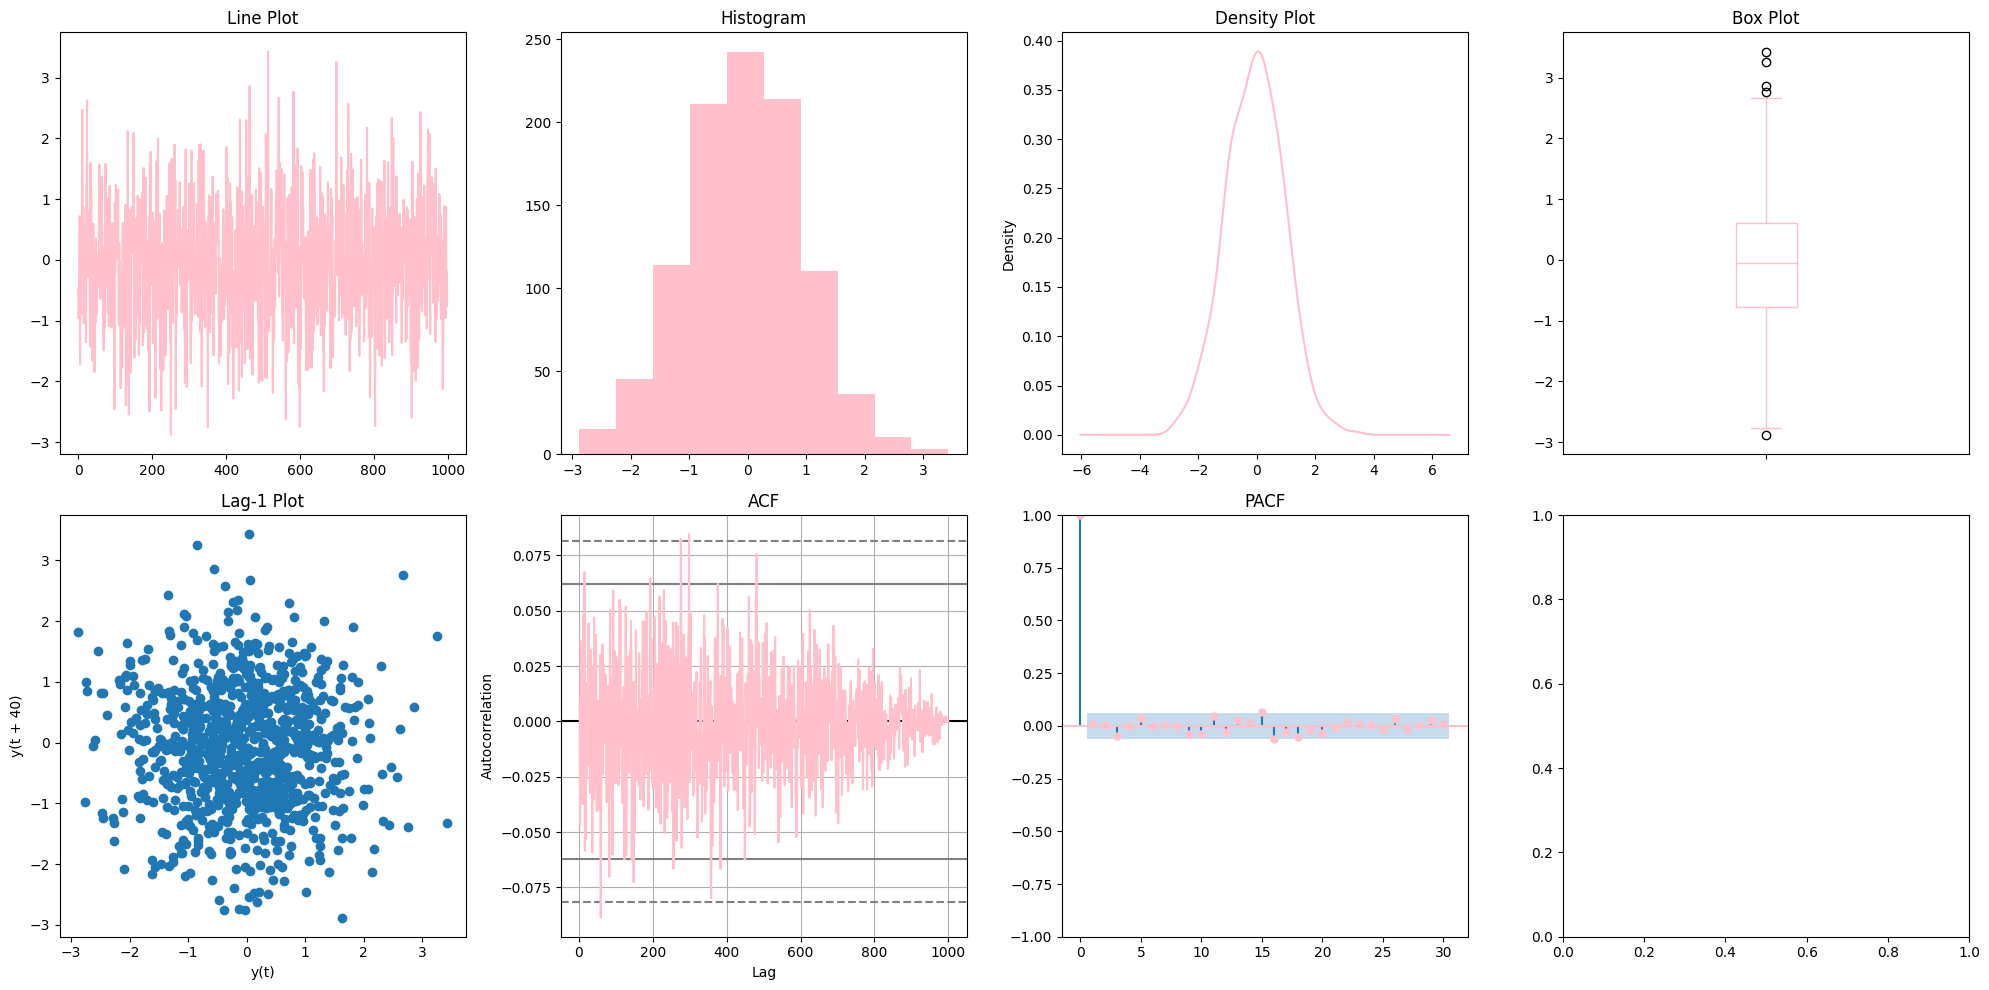

In [40]:
from random import gauss
from random import seed
from pandas import Series
from statsmodels.graphics.tsaplots import plot_pacf

#1. White Noise Time Series
# seed the random number generator
seed(10)

def createSeries(mu, sigma, n):
    return Series([gauss(mu, sigma) for i in range(n)])

# plot line plot, histogram, density plot, box plot, lag-1 plot, ACF and PACF graphs

def plot_all_graphs(series):
    # plot 8 graphs
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))

    # Line Plot of White Noise Series
    axs[0, 0].plot(series, color='pink')
    axs[0, 0].set_title('Line Plot')

    # Histogram of White Noise Series
    axs[0, 1].hist(series, color='pink')
    axs[0, 1].set_title('Histogram')

    # Density Plot
    series.plot(kind='kde', ax=axs[0, 2], color='pink')
    axs[0, 2].set_title('Density Plot')

    # Box Plot
    series.plot(kind='box', ax=axs[0, 3], color='pink')
    axs[0, 3].set_title('Box Plot')

    # Lag-1 Plot
    pd.plotting.lag_plot(series,lag=40, ax=axs[1, 0])
    axs[1, 0].set_title('Lag-1 Plot')

    # ACF graph
    pd.plotting.autocorrelation_plot(series, ax=axs[1, 1], color='pink')
    axs[1, 1].set_title('ACF')

    # PACF graph

    plot_pacf(series, ax=axs[1, 2], color='pink')
    axs[1, 2].set_title('PACF')

    # The 8th graph
    # axs[1, 3].plot() or any other plot
    # axs[1, 3].set_title('Title')
    plt.tight_layout()
    plt.show()


mu = 0
sigma = 1
# create white noise series
series = createSeries(mu, sigma, 1000)

# Print the informations of the series
print(series.describe())
plot_all_graphs(series)



2. Generate 100 random series with length 1000 data points, then use the average
values at each time to produce an average value series. Then repeat the same
process above

C:\Users\raphu\AppData\Local\Temp\ipykernel_25064\1897972368.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5215737496618404' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mean_series[i] += all_series[j][i]


count    1000.000000
mean        0.003204
std         0.097248
min        -0.287249
25%        -0.064656
50%         0.000532
75%         0.071899
max         0.333118
dtype: float64


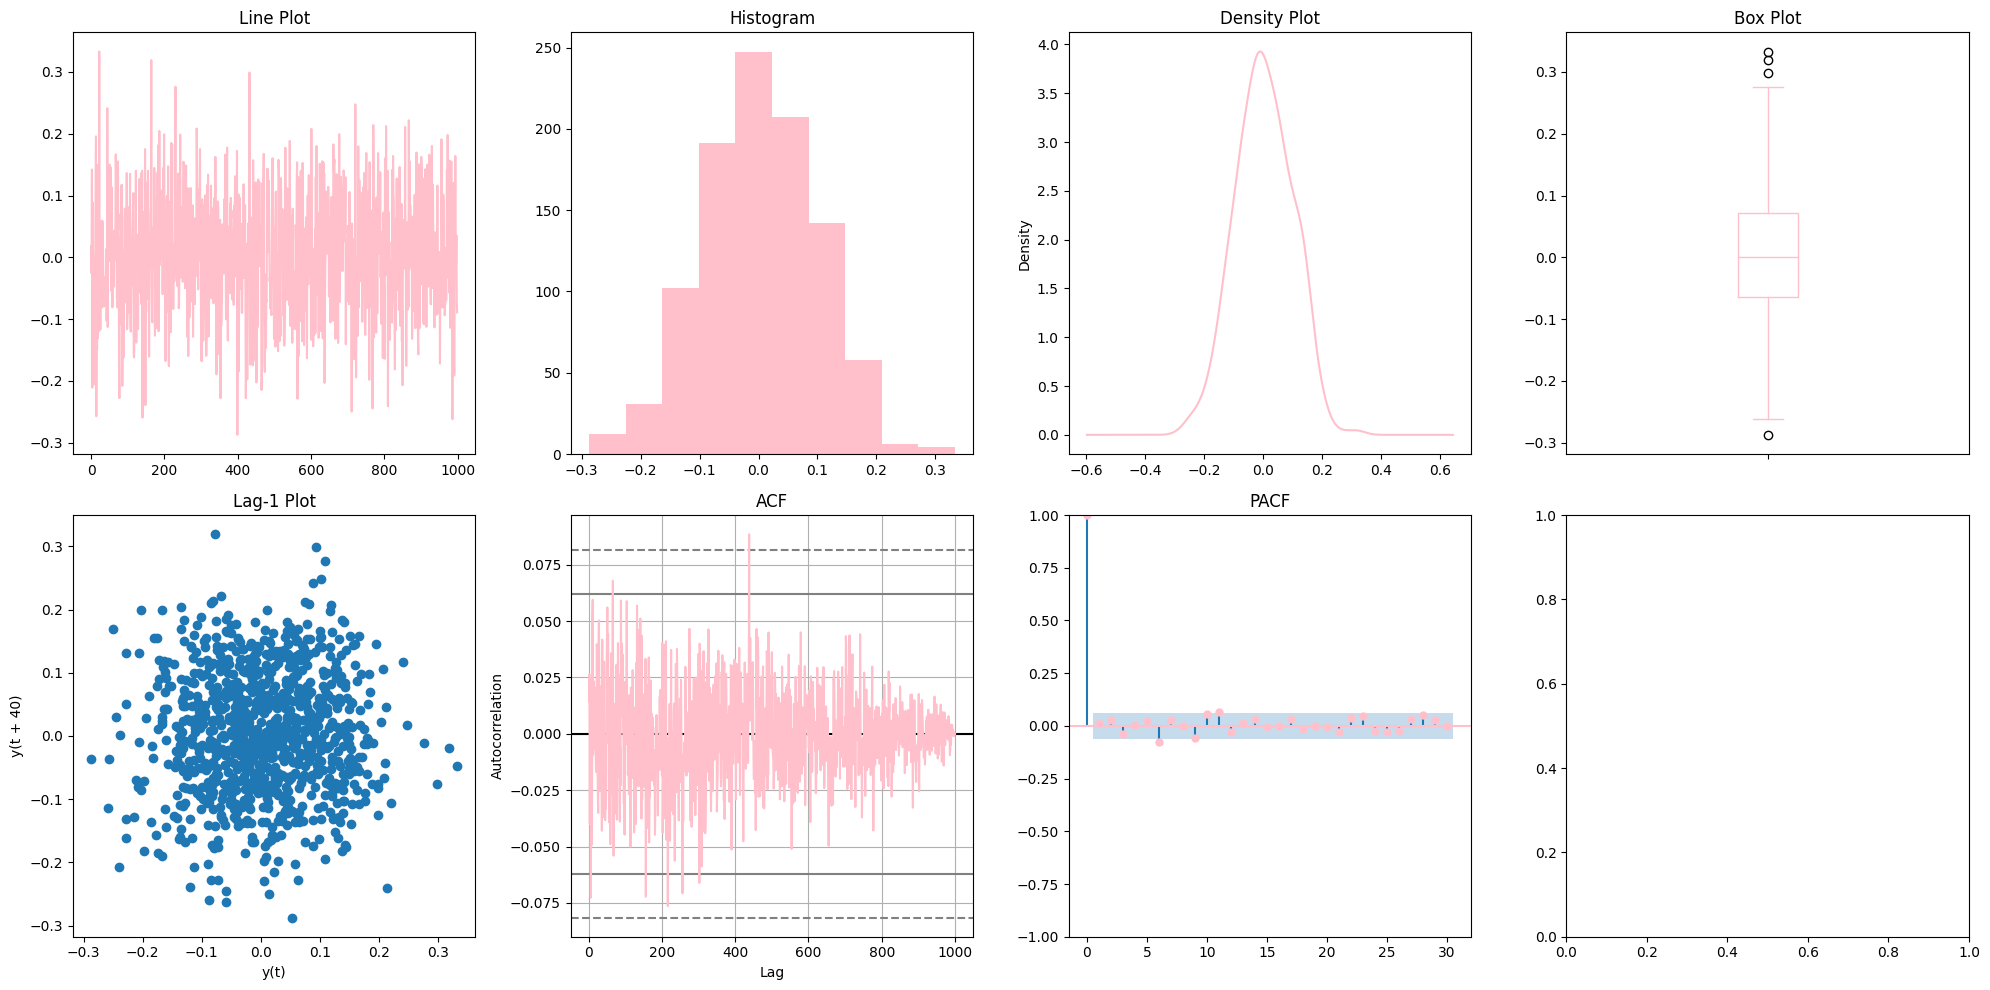

In [41]:
# 2. 100 Random series with 1000 data points
all_series = [createSeries(mu, sigma, 1000) for i in range(100)]

# use the average values at each time to produce an average value series
mean_series = Series([0 for i in range(1000)])
for i in range(len(all_series[0])):
    for j in range(1, len(all_series)):
        mean_series[i] += all_series[j][i]
    mean_series[i] /= len(all_series)

print(mean_series.describe())
plot_all_graphs(mean_series)
        
    

3. Perform randomness test on the white noise series using the Ljung-Box test.

In [44]:
# apply the Ljung-Box test to the series
from statsmodels.stats.diagnostic import acorr_ljungbox

acco = acorr_ljungbox(mean_series, lags=None)
print(acco)

      lb_stat  lb_pvalue
1    0.209612   0.647072
2    0.913240   0.633421
3    2.511843   0.473155
4    2.534945   0.638389
5    2.997271   0.700407
6    8.317121   0.215779
7    8.891058   0.260573
8    8.913012   0.349687
9   11.346760   0.252687
10  13.932070   0.176113


As we can see the series is NOT random.
- p value >>> 0.05 so we reject Hypothesis 0

4. Perform stationarity test on the white noise series using the Augmented Dickey-
Fuller (ADF) test.

In [47]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(mean_series, autolag='AIC') # AIC is the Akaike Information Criterion, it is used to determine the lag value
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critial Values:")
for key, value in result[4].items():
    print(f"    {key}, {value}")


ADF Statistic: -9.149794930033528
p-value: 2.7058925365876226e-15
Critial Values:
    1%, -3.436979275944879
    5%, -2.8644668170148058
    10%, -2.5683283824496153


The p value is *2.7058925365876226e-15* which is <<< 0.05. Hence we reject the null hypothesis and judge that the series is stationary.